In [2]:
import tools.config as config
from tools.tools import get_path,filter_all_from_dims
import xarray as xr
import os
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

import pickle
def load_dict_pickle(save_path):
    with open(save_path, "rb") as f:
        return pickle.load(f)


In [ ]:
def plot_dict_stacked(dict_df, title_names, figsize=(20, 12), n_col=3, y_label="", y_lim=None):
    """
    画 dict 的 DataFrame 累积柱形图。

    参数
    ----
    dict_df : dict[str, pd.DataFrame]
        key -> DataFrame (index=year, columns=categories)
    title_names : list
        每个子图的标题列表
    figsize : tuple
        图大小
    n_col : int
        图例的列数
    y_label : str
        整个 figure 的 Y 轴标签
    y_lim : tuple, optional
        Y 轴的范围 (min, max)
    """
    n_plots = len(dict_df)
    nrows, ncols = 3, 5
    # Set sharey=True to link all y-axes.
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, sharex=False, sharey=True)
    axes = axes.flatten()

    # 循环画每个子图
    for i, (key, df) in enumerate(dict_df.items()):
        ax = axes[i]
        df.plot(kind="bar", stacked=True, ax=ax, legend=False, width=0.8)

        ax.set_title(title_names[i])
        ax.set_xlabel("")
        # Individual y-labels are removed as we will use a figure-level one.
        ax.set_ylabel("")

        # 设置每10年显示一次
        years = df.index.to_list()
        # Ensure there are years to process
        if years:
            tick_positions = [i for i, y in enumerate(years) if y % 10 == 0]  # 每10年取一次
            tick_labels = [years[i] for i in tick_positions]
            ax.set_xticks(tick_positions)
            ax.set_xticklabels(tick_labels)

    # Apply the global y-limit to the first axis; it will propagate to all others.
    if y_lim:
        axes[0].set_ylim(y_lim)

    fig.tight_layout(rect=[0.05, 0.04, 1, 0.98])
    # 隐藏多余的子图
    handles, labels = axes[0].get_legend_handles_labels()

    # 关掉空白的子图
    for i in range(n_plots, len(axes)):
        axes[i].axis("off")

    # 在整个图的底部居中加一次图例
    fig.legend(
        handles, labels,
        loc="lower center",
        ncol=n_col,
        frameon=False
    )

    # Add a single, centered y-label for the entire figure.
    if y_label:
        fig.supylabel(y_label)

    fig.suptitle('', fontsize=16)

    plt.show()
    return fig

In [4]:
task_name = config.TASK_NAME
task_dir = f'../../../output/{task_name}'
input_files = config.input_files
years = [y for y in range(2010, 2051)]

In [16]:
output_dir = f'../../../output/{task_name}/carbon_price/5_draw_area'
results_summary = load_dict_pickle(os.path.join(output_dir, 'area_summary.pkl'))
results_mgt = load_dict_pickle(os.path.join(output_dir, 'area_mgt_am.pkl'))
results_nonag = load_dict_pickle(os.path.join(output_dir, 'area_nonag_lu.pkl'))

In [17]:
results_mgt = {key: df.T for key, df in results_mgt.items()}
results_nonag = {key: df.T for key, df in results_nonag.items()}

In [23]:
results_summary[input_files[0]].index

Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033,
       2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
       2046, 2047, 2048, 2049, 2050],
      dtype='int64', name='year')

In [24]:
results_mgt[input_files[0]].index

Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033,
       2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
       2046, 2047, 2048, 2049, 2050],
      dtype='int64')

In [8]:
title_names = ['Counterfactual',r'$\mathrm{GHG}_{\mathrm{low}}$', r'$\mathrm{GHG}_{\mathrm{high}}$',

               r'$\mathrm{GHG}_{\mathrm{low}}$,$\mathrm{Bio}_{\mathrm{10}}$',
               r'$\mathrm{GHG}_{\mathrm{low}}$,$\mathrm{Bio}_{\mathrm{20}}$',
               r'$\mathrm{GHG}_{\mathrm{low}}$,$\mathrm{Bio}_{\mathrm{30}}$',
               r'$\mathrm{GHG}_{\mathrm{low}}$,$\mathrm{Bio}_{\mathrm{40}}$',
               r'$\mathrm{GHG}_{\mathrm{low}}$,$\mathrm{Bio}_{\mathrm{50}}$',
               
               r'$\mathrm{GHG}_{\mathrm{high}}$,$\mathrm{Bio}_{\mathrm{10}}$',
               r'$\mathrm{GHG}_{\mathrm{high}}$,$\mathrm{Bio}_{\mathrm{20}}$',
               r'$\mathrm{GHG}_{\mathrm{high}}$,$\mathrm{Bio}_{\mathrm{30}}$',
               r'$\mathrm{GHG}_{\mathrm{high}}$,$\mathrm{Bio}_{\mathrm{40}}$',
               r'$\mathrm{GHG}_{\mathrm{high}}$,$\mathrm{Bio}_{\mathrm{50}}$',
               ]

In [36]:
fig_summary = plot_dict_stacked(results_summary, title_names, figsize=(20, 12))
fig_summary.savefig(os.path.join(output_dir, 'area_summary_stacked.png'), dpi=300)

KeyboardInterrupt: 

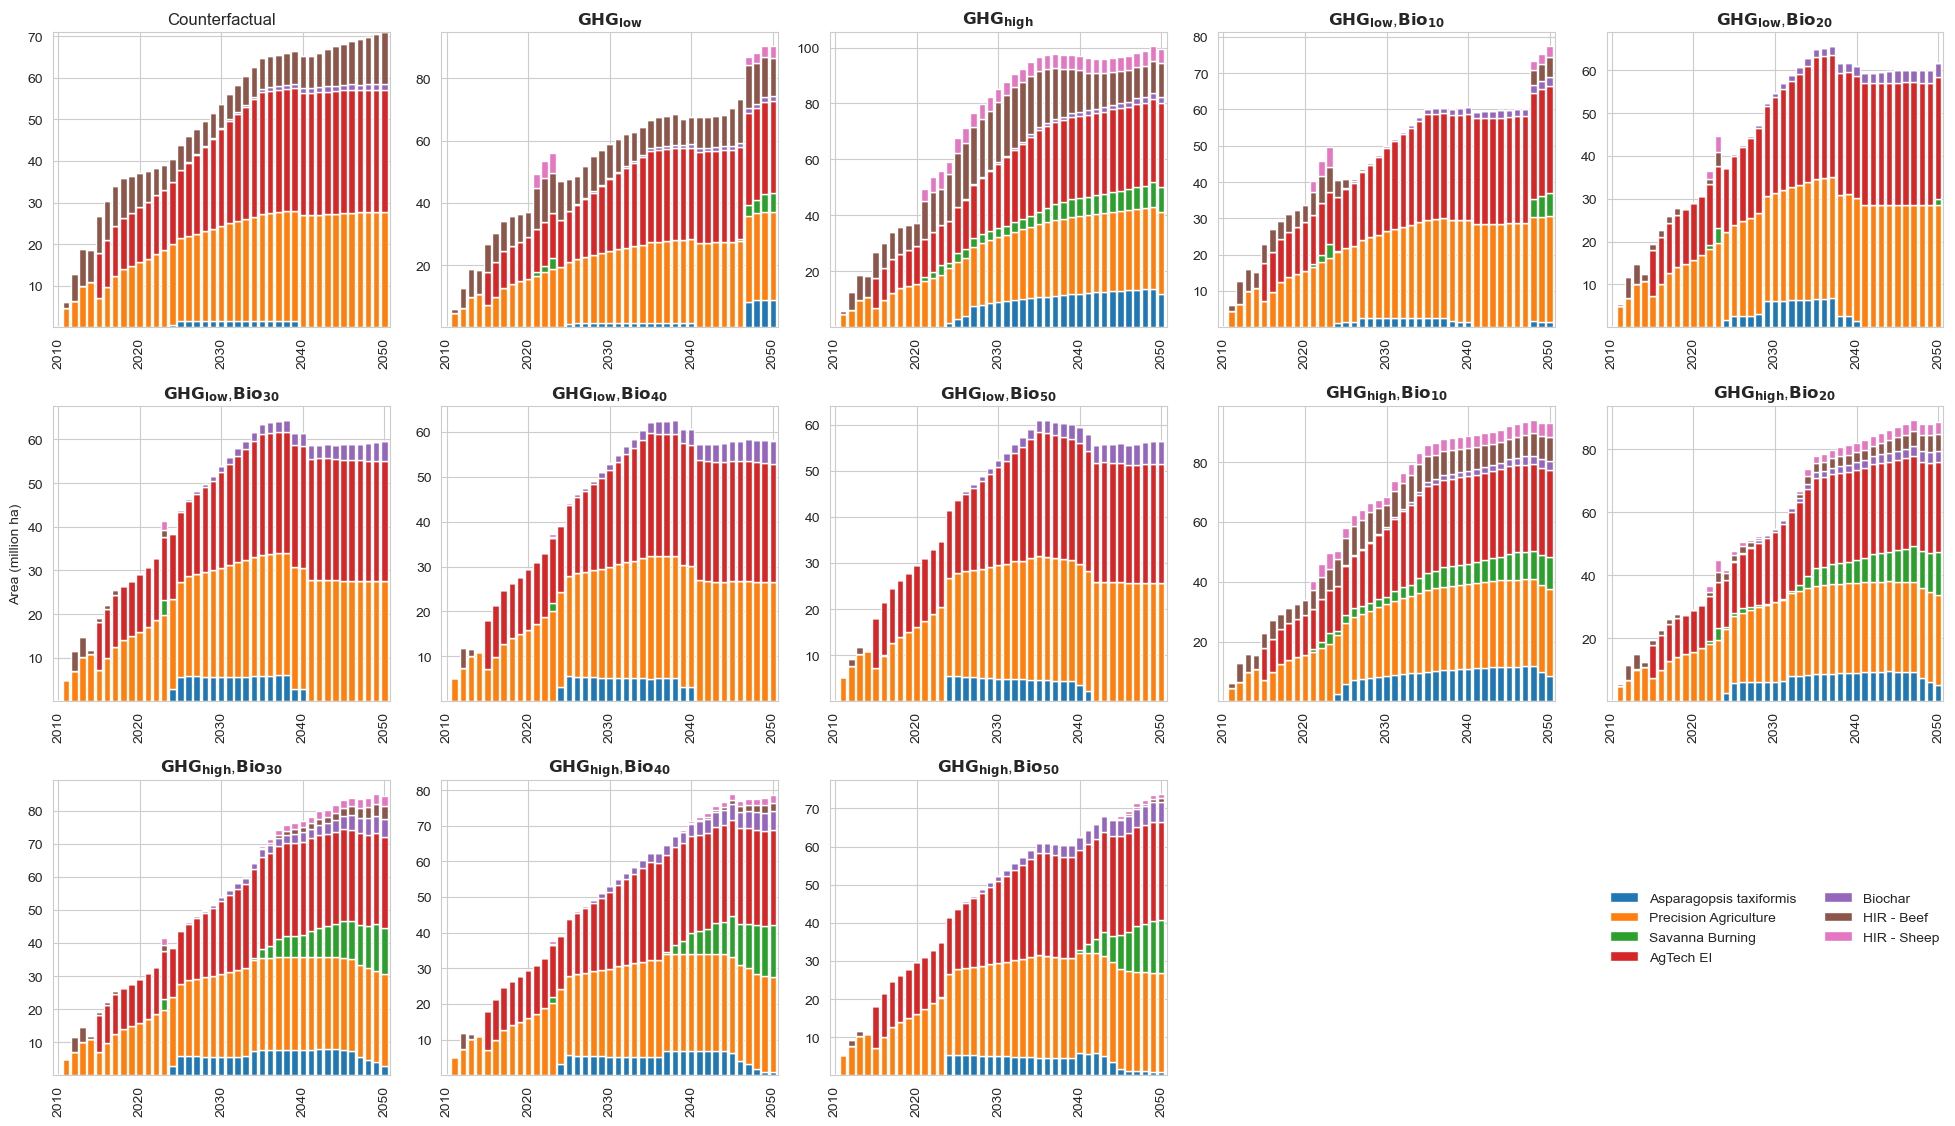

In [34]:
fig_mgt = plot_dict_stacked(results_mgt, title_names, figsize=(20, 12),n_col=2)
fig_mgt.savefig(os.path.join(output_dir, 'area_mgt_am_stacked.png'), dpi=300)

In [ ]:
fig_nonag = plot_dict_stacked(results_nonag, title_names, figsize=(20, 12),n_col=2)
fig_nonag.savefig(os.path.join(output_dir, 'area_nonag_lu_stacked.png'), dpi=300)

In [37]:
da = xr.open_dataarray(r"N:\LUF-Modelling\LUTO2_XH\LUTO2\output\20250908_Paper2_Results_NCI\Run_06_GHG_high_BIO_off_CUT_50\output\2025_09_08__09_33_34_RF5_2010-2050\out_2050\xr_area_non_agricultural_landuse_2050.nc")

In [ ]:
da = filter_all_from_dims(da)